In [1]:
# Importing the required Python packages

import rasterio
from rasterio.plot import show
import numpy as np
import shapely.geometry
import geopandas as gpd
import glob

In [ ]:
### Setting the data path
data_path = r'YOUR FILE PATH'

# Setting the folder we want to write the output data to
out_path = r"YOUR FILE PATH"

### Making a connection to the raster file

In [2]:
lc = rasterio.open(data_path + "LCMS_CONUS_v2021-7_Land_Cover_Annual_2021\\LCMS_CONUS_v2021-7_Land_Cover_2021.tif", mode='r')
lc

<open DatasetReader name='G:/My Drive/Geospatial Data Science with Python/Data/LCMS_CONUS_v2021-7_Land_Cover_Annual_2021/LCMS_CONUS_v2021-7_Land_Cover_2021.tif' mode='r'>

### Working with the raster file properties

In [3]:
lc.name

'G:/My Drive/Geospatial Data Science with Python/Data/LCMS_CONUS_v2021-7_Land_Cover_Annual_2021/LCMS_CONUS_v2021-7_Land_Cover_2021.tif'

In [4]:
lc.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 154180,
 'height': 97279,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(30.0, 0.0, -2361585.0,
        0.0, -30.0, 3177435.0)}

In [5]:
lc.driver

'GTiff'

In [6]:
lc.crs

CRS.from_wkt('PROJCS["Albers_Conical_Equal_Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
lc.count

1

### Pulling the bounding box and converting it to a shapely geometry

In [8]:
lc.bounds

BoundingBox(left=-2361585.0, bottom=259065.0, right=2263815.0, top=3177435.0)

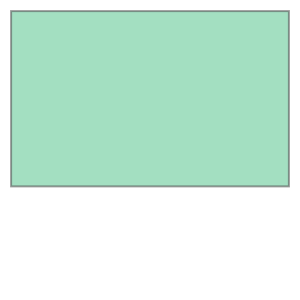

In [9]:
lc_bbox = shapely.geometry.box(*lc.bounds)
lc_bbox

### Plotting the raster data

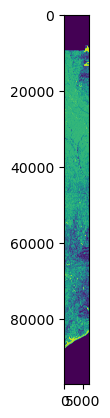

In [10]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

left = -100000.0
right = 100000.0
top = 3177435
bottom = 259065.0

with rasterio.open(data_path + "LCMS_CONUS_v2021-7_Land_Cover_Annual_2021\\LCMS_CONUS_v2021-7_Land_Cover_2021.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    show(rst)

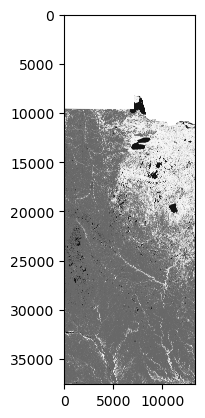

In [11]:
left = -150000.0
right = 250000.0
top = 3177435
bottom = 2050000.0

with rasterio.open(data_path + "LCMS_CONUS_v2021-7_Land_Cover_Annual_2021\\LCMS_CONUS_v2021-7_Land_Cover_2021.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    show(rst, cmap="Greys")

### Writing Raster Data

In [ ]:
# Code needs revision

In [14]:
rst

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  1, 10, ..., 10, 10, 10],
       [10,  1, 10, ..., 10, 10, 10],
       [10,  1, 10, ..., 10, 10, 10]], dtype=uint8)

In [15]:
new_transform = rasterio.transform.from_origin(west=-150000.0, north= 250000.0, xsize=90, ysize=90)
new_transform

Affine(90.0, 0.0, -150000.0,
       0.0, -90.0, 250000.0)

In [16]:
new_raster = rasterio.open(out_path + "\LC_Subset.tif", 
                           mode='w',
                           driver = "GTiff",
                           height = rst.shape[0],
                           width = rst.shape[1],
                           count = 1,
                           dtype = rst.dtype,
                           crs = 4326,
                           transform = new_transform
                          )